<a href="https://colab.research.google.com/github/RogatorM/my_package/blob/master/HackathornClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
train= pd.read_csv('trainingX.csv')
train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [5]:
test= pd.read_csv('testX.csv')
test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256.0,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000.0,2019-02-13T10:01:40Z,4.0
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256.0,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000.0,2019-02-13T10:02:12Z,2.0
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256.0,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50.0,2019-02-13T10:02:30Z,2.0
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256.0,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000.0,2019-02-13T10:02:38Z,4.0
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256.0,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60.0,2019-02-13T10:02:58Z,2.0


In [6]:
df =pd.concat([train, test], axis=0, sort=True)
df.head()

,AccountId,Amount,BatchId,ChannelId,CountryCode,CurrencyCode,CustomerId,FraudResult,PricingStrategy,ProductCategory,ProductId,ProviderId,SubscriptionId,TransactionId,TransactionStartTime,Value
0,AccountId_3957,1000.0,BatchId_36123,ChannelId_3,256.0,UGX,CustomerId_4406,0.0,2.0,airtime,ProductId_10,ProviderId_6,SubscriptionId_887,TransactionId_76871,2018-11-15T02:18:49Z,1000.0
1,AccountId_4841,-20.0,BatchId_15642,ChannelId_2,256.0,UGX,CustomerId_4406,0.0,2.0,financial_services,ProductId_6,ProviderId_4,SubscriptionId_3829,TransactionId_73770,2018-11-15T02:19:08Z,20.0
2,AccountId_4229,500.0,BatchId_53941,ChannelId_3,256.0,UGX,CustomerId_4683,0.0,2.0,airtime,ProductId_1,ProviderId_6,SubscriptionId_222,TransactionId_26203,2018-11-15T02:44:21Z,500.0
3,AccountId_648,20000.0,BatchId_102363,ChannelId_3,256.0,UGX,CustomerId_988,0.0,2.0,utility_bill,ProductId_21,ProviderId_1,SubscriptionId_2185,TransactionId_380,2018-11-15T03:32:55Z,21800.0
4,AccountId_4841,-644.0,BatchId_38780,ChannelId_2,256.0,UGX,CustomerId_988,0.0,2.0,financial_services,ProductId_6,ProviderId_4,SubscriptionId_3829,TransactionId_28195,2018-11-15T03:34:21Z,644.0


In [7]:
df.shape

(125300, 16)

In [0]:
y = df['FraudResult'] #label / response variable
X= df.drop('FraudResult', axis = 1) #features

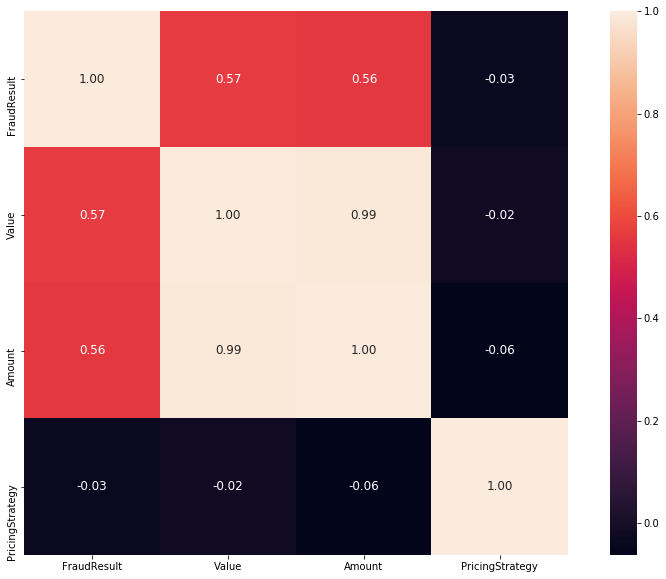

In [13]:
corr_overall = train.corr()
k=13

col = corr_overall.nlargest(k, 'FraudResult')['FraudResult'].index
corr_coeff = np.corrcoef(train[col].values.T)
ax = plt.subplots(figsize=(15,10))
heatmap = sns.heatmap(corr_coeff, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':12}, yticklabels=col.values, xticklabels=col.values)

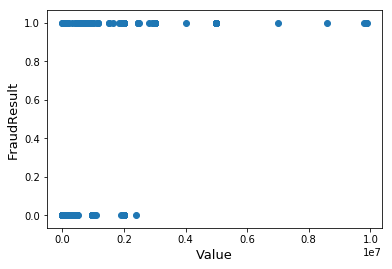

In [10]:
fig, plot = plt.subplots()
plot.scatter(x= train['Value'], y= train['FraudResult'])
plt.ylabel('FraudResult', fontsize=13)
plt.xlabel('Value', fontsize=13)
plt.show()

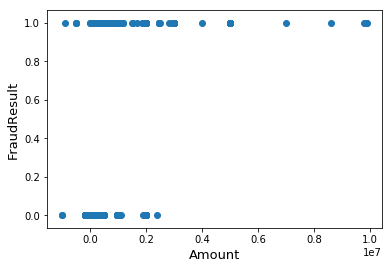

In [11]:
fig, plot = plt.subplots()
plot.scatter(x= train['Amount'], y= train['FraudResult'])
plt.ylabel('FraudResult', fontsize=13)
plt.xlabel('Amount', fontsize=13)
plt.show()

Selection of features for the first model

In [16]:
#features_na = (features.isnull().sum() / len(features)) * 100
df_na = (df.isnull().sum() / len(df)) * 100
df_na

AccountId                0.000000
Amount                   0.000798
BatchId                  0.000000
ChannelId                0.000798
CountryCode              0.000798
CurrencyCode             0.000798
CustomerId               0.000798
FraudResult             23.653631
PricingStrategy          0.000798
ProductCategory          0.000798
ProductId                0.000798
ProviderId               0.000798
SubscriptionId           0.000000
TransactionId            0.000000
TransactionStartTime     0.000798
Value                    0.000798
dtype: float64

In [0]:
#mean
def fill_na_num_mean(df,column_name):

    df[column_name] = df[column_name].transform(lambda x: x.fillna(round(x.mean(),1)))
    
    return df
#median
def fill_na_num_median(df,column_name):

    df[column_name] = df[column_name].transform(lambda x: x.fillna(round(x.median(),1)))
    
    return df

#Nan to None
def fill_na_cat_none(df,column_name):
    df[column_name].fillna('None',inplace=True)
    
#Nan to 0 
def fill_na_num_0(df,column_name):
    df[column_name].fillna(0,inplace=True)
    
#mode
def fill_na_mode(df,column_name):
    df[column_name].fillna(df[column_name].mode()[0], inplace = True)
    

In [0]:
fill_na_num_0(df,'FraudResult')

In [40]:
fill_na_num_mean(df,'Amount')

,AccountId,Amount,BatchId,ChannelId,CountryCode,CurrencyCode,CustomerId,FraudResult,PricingStrategy,ProductCategory,ProductId,ProviderId,SubscriptionId,TransactionId,TransactionStartTime,Value
0,AccountId_3957,1000.0,BatchId_36123,ChannelId_3,256.0,UGX,CustomerId_4406,0.0,2.0,airtime,ProductId_10,ProviderId_6,SubscriptionId_887,TransactionId_76871,2018-11-15T02:18:49Z,1000.0
1,AccountId_4841,-20.0,BatchId_15642,ChannelId_2,256.0,UGX,CustomerId_4406,0.0,2.0,financial_services,ProductId_6,ProviderId_4,SubscriptionId_3829,TransactionId_73770,2018-11-15T02:19:08Z,20.0
2,AccountId_4229,500.0,BatchId_53941,ChannelId_3,256.0,UGX,CustomerId_4683,0.0,2.0,airtime,ProductId_1,ProviderId_6,SubscriptionId_222,TransactionId_26203,2018-11-15T02:44:21Z,500.0
3,AccountId_648,20000.0,BatchId_102363,ChannelId_3,256.0,UGX,CustomerId_988,0.0,2.0,utility_bill,ProductId_21,ProviderId_1,SubscriptionId_2185,TransactionId_380,2018-11-15T03:32:55Z,21800.0
4,AccountId_4841,-644.0,BatchId_38780,ChannelId_2,256.0,UGX,CustomerId_988,0.0,2.0,financial_services,ProductId_6,ProviderId_4,SubscriptionId_3829,TransactionId_28195,2018-11-15T03:34:21Z,644.0
5,AccountId_1078,2000.0,BatchId_25954,ChannelId_3,256.0,UGX,CustomerId_1432,0.0,2.0,airtime,ProductId_3,ProviderId_6,SubscriptionId_4238,TransactionId_23223,2018-11-15T03:35:10Z,2000.0
6,AccountId_2442,10000.0,BatchId_118460,ChannelId_3,256.0,UGX,CustomerId_2858,0.0,4.0,airtime,ProductId_3,ProviderId_5,SubscriptionId_1980,TransactionId_118063,2018-11-15T03:44:31Z,10000.0
7,AccountId_4841,-500.0,BatchId_38561,ChannelId_2,256.0,UGX,CustomerId_2858,0.0,2.0,financial_services,ProductId_6,ProviderId_4,SubscriptionId_3829,TransactionId_100640,2018-11-15T03:45:13Z,500.0
8,AccountId_272,500.0,BatchId_93774,ChannelId_3,256.0,UGX,CustomerId_598,0.0,2.0,airtime,ProductId_10,ProviderId_6,SubscriptionId_4731,TransactionId_51905,2018-11-15T04:14:59Z,500.0
9,AccountId_710,600.0,BatchId_82409,ChannelId_3,256.0,UGX,CustomerId_1053,0.0,2.0,financial_services,ProductId_15,ProviderId_1,SubscriptionId_920,TransactionId_130161,2018-11-15T04:31:48Z,600.0


In [41]:
fill_na_num_mean(df,'Value')

,AccountId,Amount,BatchId,ChannelId,CountryCode,CurrencyCode,CustomerId,FraudResult,PricingStrategy,ProductCategory,ProductId,ProviderId,SubscriptionId,TransactionId,TransactionStartTime,Value
0,AccountId_3957,1000.0,BatchId_36123,ChannelId_3,256.0,UGX,CustomerId_4406,0.0,2.0,airtime,ProductId_10,ProviderId_6,SubscriptionId_887,TransactionId_76871,2018-11-15T02:18:49Z,1000.0
1,AccountId_4841,-20.0,BatchId_15642,ChannelId_2,256.0,UGX,CustomerId_4406,0.0,2.0,financial_services,ProductId_6,ProviderId_4,SubscriptionId_3829,TransactionId_73770,2018-11-15T02:19:08Z,20.0
2,AccountId_4229,500.0,BatchId_53941,ChannelId_3,256.0,UGX,CustomerId_4683,0.0,2.0,airtime,ProductId_1,ProviderId_6,SubscriptionId_222,TransactionId_26203,2018-11-15T02:44:21Z,500.0
3,AccountId_648,20000.0,BatchId_102363,ChannelId_3,256.0,UGX,CustomerId_988,0.0,2.0,utility_bill,ProductId_21,ProviderId_1,SubscriptionId_2185,TransactionId_380,2018-11-15T03:32:55Z,21800.0
4,AccountId_4841,-644.0,BatchId_38780,ChannelId_2,256.0,UGX,CustomerId_988,0.0,2.0,financial_services,ProductId_6,ProviderId_4,SubscriptionId_3829,TransactionId_28195,2018-11-15T03:34:21Z,644.0
5,AccountId_1078,2000.0,BatchId_25954,ChannelId_3,256.0,UGX,CustomerId_1432,0.0,2.0,airtime,ProductId_3,ProviderId_6,SubscriptionId_4238,TransactionId_23223,2018-11-15T03:35:10Z,2000.0
6,AccountId_2442,10000.0,BatchId_118460,ChannelId_3,256.0,UGX,CustomerId_2858,0.0,4.0,airtime,ProductId_3,ProviderId_5,SubscriptionId_1980,TransactionId_118063,2018-11-15T03:44:31Z,10000.0
7,AccountId_4841,-500.0,BatchId_38561,ChannelId_2,256.0,UGX,CustomerId_2858,0.0,2.0,financial_services,ProductId_6,ProviderId_4,SubscriptionId_3829,TransactionId_100640,2018-11-15T03:45:13Z,500.0
8,AccountId_272,500.0,BatchId_93774,ChannelId_3,256.0,UGX,CustomerId_598,0.0,2.0,airtime,ProductId_10,ProviderId_6,SubscriptionId_4731,TransactionId_51905,2018-11-15T04:14:59Z,500.0
9,AccountId_710,600.0,BatchId_82409,ChannelId_3,256.0,UGX,CustomerId_1053,0.0,2.0,financial_services,ProductId_15,ProviderId_1,SubscriptionId_920,TransactionId_130161,2018-11-15T04:31:48Z,600.0


In [42]:
df_na = (df.isnull().sum() / len(df)) * 100
df_na

AccountId               0.000000
Amount                  0.000000
BatchId                 0.000000
ChannelId               0.000798
CountryCode             0.000798
CurrencyCode            0.000798
CustomerId              0.000798
FraudResult             0.000000
PricingStrategy         0.000798
ProductCategory         0.000798
ProductId               0.000798
ProviderId              0.000798
SubscriptionId          0.000000
TransactionId           0.000000
TransactionStartTime    0.000798
Value                   0.000000
dtype: float64

In [0]:
y=df['FraudResult']
X_First=df[['Amount', 'Value']]

In [0]:
from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split

In [0]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_First) 

In [46]:
X_standardize = pd.DataFrame(X_scaled, columns = X_First.columns)
X_standardize.head()

,Amount,Value
0,-0.047557,-0.075971
1,-0.056093,-0.084187
2,-0.051741,-0.080163
3,0.111449,0.098406
4,-0.061315,-0.078956


In [0]:
from sklearn.model_selection import train_test_split
X_train_First, X_test_First,y_train,y_test = train_test_split(X_scaled,y, test_size = 0.20, random_state =42)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
First = LogisticRegression()

In [50]:
First.fit(X_train_First,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pred_First = First.predict(X_test_First)

In [0]:
TransactionId=First.predict(X_test_First)

In [0]:
FraudResult= First.predict(X_test_First)

In [0]:
df=pd.DataFrame({'TransactionId':TransactionId, 'FraudResult':FraudResult })

In [0]:
df.to_csv('hacka1.csv', index = False)